In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy.random as npr
import scipy

In [2]:
data = np.load('../../data/assigment_5/data.npy')

# Metropolis Algorithm

In this week's assigment we will code the Metropolis algorithm from scratch. <br>
The data containe in the `data.txt` file are distributed according to a normal distribution with mean $\mu$ and standard deviation $\sigma$. <br>

$$
\begin{equation}
\mathcal{f}_X(x|\mu, \sigma) \quad = \quad  \dfrac{1}{\sqrt{2 \pi \sigma^2}} \exp \left\{ - \dfrac{(x-\mu)^2}{2 \sigma^2} \right\}
\end{equation}
$$

The 2 parameters to infer are $\mu$ and $\sigma$. Whose prior distributions are given by,

$$
\begin{equation}
\mathcal{f}_{prior}(\mu) \quad = \quad  \dfrac{1}{\sqrt{2 \pi s^2}} \exp \left\{ - \dfrac{(\mu-m)^2}{2 s^2} \right\}, \quad \quad \text{with} \quad m = 4 \quad \text{and} \quad s = 2
\end{equation}
$$

And, as far as $\sigma$,

$$
\begin{equation}

\mathcal{f}_{prior}(\sigma) \quad = \quad  \dfrac{\beta^{\alpha}}{\Gamma(\alpha)} \cdot \dfrac{1}{x^{\alpha + 1}} \cdot exp \{ - \dfrac{\beta}{x} \} \quad \quad \text{with} \quad \alpha = 2 \quad \text{and} \quad \beta = 1

\end{equation}

In the Metropolis algorithm we randomly start from random values fro $\mu$ and $\sigma$, then we make a proposal for both parameters through sampling from a $2D$ Gaussian distribution. <br>
We accept the proposal with a probability that is $p = max\{ 1, \dfrac{\mathcal{f}_{post}(\theta')}{\mathcal{f}_{post}(\theta)} \}$, where $\theta$ is the current value of the parameters and $\theta'$ is the proposed value and $\mathcal{f}_{post}(\theta)$ is the posterior distribution of the parameters given by $\mathcal{f}_{post}(\theta|x) = \mathcal{f}_X(x|\theta) \cdot \mathcal{f}_{prior}(\mu) \cdot \mathcal{f}_{prior}(\sigma)$

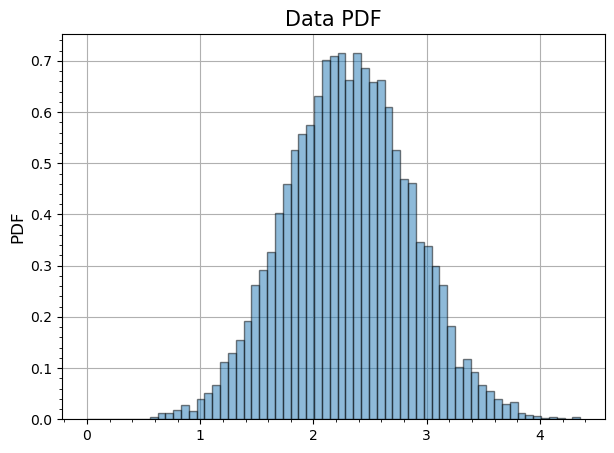

In [3]:
# Visualizing the data

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.hist(data, bins='fd', density=True, alpha = 0.5, edgecolor='black', zorder = 2)
ax.grid(zorder = 1)
ax.minorticks_on()
ax.set_title('Data PDF', fontsize = 15)
ax.set_ylabel('PDF', fontsize = 12)
plt.show()

In [4]:
def prior_sigma(x, alpha, beta):
    prior = (beta**(alpha) / scipy.special.gamma(alpha)) * (1 / x**(alpha + 1)) * np.exp(-beta / x) 
    return prior

def likelihood(x, mu, sigma):
    likelihood = scipy.stats.norm.pdf(x, loc=mu, scale=sigma)
    return np.prod(likelihood)

def log_likelihood(x, mu, sigma):
    likelihood = scipy.stats.norm.pdf(x, loc=mu, scale=sigma)
    return np.sum(np.log(likelihood))

def prior(mu, m, s):
    prior = scipy.stats.norm.pdf(mu, loc=m, scale=s)
    return prior

def posterior(array, mu, sigma, m, s, alpha, beta):
    post = np.prod(likelihood(array, mu, sigma)) * prior(mu, m, s) * prior_sigma(sigma, alpha, beta)
    return post

In [5]:
m = 4; s = 2; alpha = 2; beta = 1

In [6]:
n_accepted_values = 1000
# Initial values
current_sigma = 2
current_mu = 2



# List to stole the values
sigma_list = []
mu_list = []

# making the loop
while len(sigma_list) < n_accepted_values: 
    # Proposing a new value
    new_sigma = npr.normal(current_sigma, 0.1)
    new_mu = npr.normal(current_mu, 0.1)
     
    
    
    
    
    
    # Calculating the posterior
    posterior_current = log_likelihood(data, current_mu, current_sigma) + np.log(prior(current_mu, m, s)) +\
         np.log(prior_sigma(current_sigma, alpha, beta))
    
    posterior_proposal = log_likelihood(data, new_mu, new_sigma) + np.log(prior(new_mu, m, s)) +\
            np.log(prior_sigma(new_sigma, alpha, beta))
    
    # Calculating the acceptance probability
    p = np.min([1, np.exp(posterior_proposal - posterior_current)])
    print(len(sigma_list), p)
    # Accepting or rejecting the new value
    u = npr.uniform(0, 1)
    if u < p:
        current_sigma = new_sigma
        current_mu = new_mu
        sigma_list.append(current_sigma)
        mu_list.append(current_mu)

    
    

0 6.057795440335054e-19
0 3.128328194272021e-95
0 1.3465537410978989e-08
0 1.0
1 1.0
2 0.0
2 1.0
3 8.506126137686856e-230
3 0.0
3 1.0
4 2.965821775529276e-09
4 7.781913329011047e-30
4 1.0
5 1.8286433448315513e-214
5 1.0
6 1.0
7 2.5618065105139123e-115
7 1.0
8 4.936072000298206e-195
8 3.803856356772757e-111
8 1.705604245672415e-158
8 0.0
8 1.1550495284485305e-166
8 2.724250777334575e-99
8 8.4491538634e-314
8 0.0
8 1.46223480969191e-173
8 5.979609729921755e-225
8 1.0
9 5.356783121505932e-95
9 1.0
10 6.94413875e-316
10 1.0
11 1.0
12 1.4003622150640979e-273
12 1.0
13 4.641410494063928e-184
13 2.2180485022303903e-186
13 1.0
14 0.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 0.0
19 0.0
19 7.137905874386673e-121
19 1.0
20 1.0
21 0.0
21 2.681789792770515e-67
21 0.0
21 1.411353414166809e-91
21 8.211828308101448e-21
21 1.0
22 7.204745014654985e-174
22 1.2597091831482031e-144
22 2.3804280639885108e-130
22 7.06319900216607e-07
22 0.0
22 1.807313256348565e-50
22 2.9220190429078855e-180
22 1.2594967846064

/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_1255/131390700.py:31: RuntimeWarning: overflow encountered in exp
  p = np.min([1, np.exp(posterior_proposal - posterior_current)])


24 1.2426681825144994e-98
24 4.793964875866062e-47
24 4.4469301559958444e-189
24 0.026182188697882542
24 1.199500259012153e-150
24 2.8440202299599844e-16
24 3.276549902750731e-133
24 0.0
24 0.0
24 1.006745543551829e-307
24 5.2374989418362676e-110
24 0.0
24 0.0
24 1.0
25 4.664143464594951e-99
25 0.0
25 2.4077606178695555e-58
25 0.0
25 3.023805427167557e-126
25 1.2382008919703855e-71
25 2.4546874109400707e-09
25 3.662223160288469e-86
25 1.4511654097660034e-11
25 1.671215446385586e-171
25 0.027740545751462224
25 2.1883229272655714e-25
25 2.4959803454978713e-10
25 1.2397066884979989e-104
25 0.0
25 8.262886385614154e-47
25 4.5885890626686625e-20
25 3.6674924471741215e-213
25 1.6164609025395134e-42
25 2.648191119108293e-224
25 3.145131675343003e-69
25 1.8950349669610405e-31
25 3.807578161152135e-08
25 0.0
25 3.7179578648469643e-98
25 5.436562430807252e-73
25 6.281099873077464e-302
25 5.502690059710713e-144
25 3.912713697125014e-253
25 5.428535110860422e-211
25 6.298754716282639e-161
25 5.621

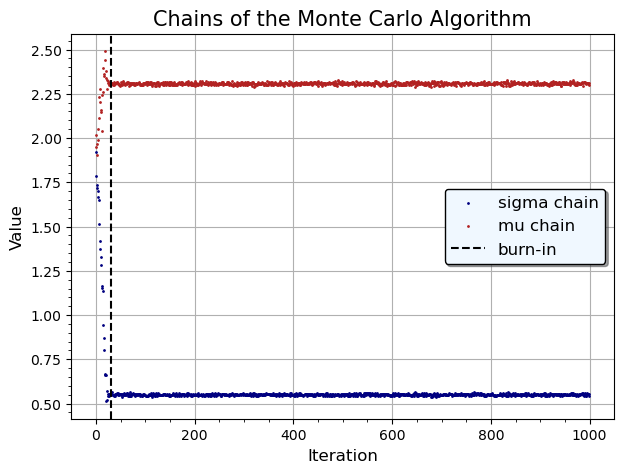

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.scatter(x = np.arange(len(sigma_list)), y = sigma_list, s=1, color = 'navy', zorder = 2, label = 'sigma chain')
ax.scatter(x = np.arange(len(mu_list)), y = mu_list, s=1, color = 'firebrick', zorder = 2, label = 'mu chain')
ax.grid(zorder = 1)
ax.minorticks_on()
ax.axvline(x = 30, color = 'black', linestyle = '--', zorder = 3, label = 'burn-in')
ax.set_title('Chains of the Monte Carlo Algorithm', fontsize = 15)
ax.set_ylabel('Value', fontsize = 12)
ax.set_xlabel('Iteration', fontsize = 12)
ax.legend(facecolor = 'aliceblue', shadow = True, edgecolor = 'black', fontsize = 12)
plt.show()

Given our results we consider a burn-in of 30 steps, in the following we plot the posterior for our samples.

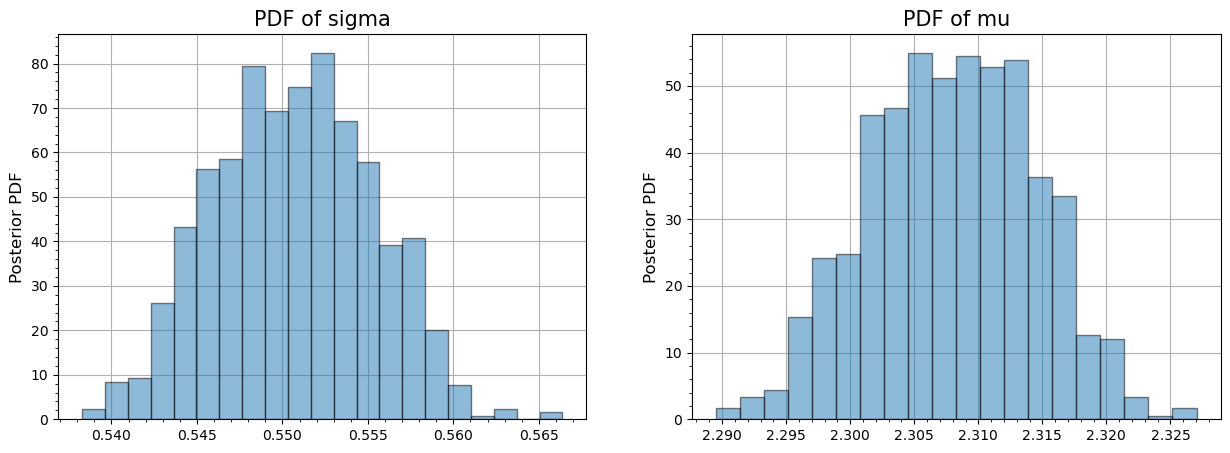

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

counts_sigma, edges_sigma, _ = ax[0].hist(sigma_list[30:], bins='fd', density=True, alpha = 0.5, edgecolor='black', zorder = 2)
ax[0].grid(zorder = 1)
ax[0].minorticks_on()
ax[0].set_title('PDF of sigma', fontsize = 15)
ax[0].set_ylabel('Posterior PDF', fontsize = 12)


counts_mu, edges_mu, _ = ax[1].hist(mu_list[30:], bins='fd', density=True, alpha = 0.5, edgecolor='black', zorder = 2)
ax[1].grid(zorder = 1)
ax[1].minorticks_on()
ax[1].set_title('PDF of mu', fontsize = 15)
ax[1].set_ylabel('Posterior PDF', fontsize = 12)
plt.show()


In [10]:
idx_max_sigma = np.argmax(counts_sigma)
idx_max_mu = np.argmax(counts_mu)

max_sigma = edges_sigma[idx_max_sigma] + (edges_sigma[idx_max_sigma + 1] - edges_sigma[idx_max_sigma]) / 2
max_mu = edges_mu[idx_max_mu] + (edges_mu[idx_max_mu + 1] - edges_mu[idx_max_mu]) / 2

print(max_sigma, max_mu)

0.5523289290059918 2.3054715653423807


Let's see how our estimates fro the posterior values fare against the data.

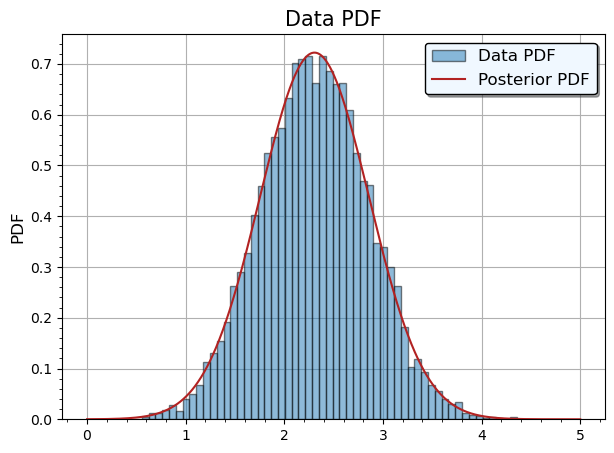

In [11]:
x_axis = np.linspace(0, 5, 1000)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.hist(data, bins='fd', density=True, alpha = 0.5, edgecolor='black', zorder = 2, label = 'Data PDF')
ax.grid(zorder = 1)
ax.minorticks_on()
ax.set_title('Data PDF', fontsize = 15)
ax.set_ylabel('PDF', fontsize = 12)
ax.plot(x_axis, scipy.stats.norm.pdf(x_axis, loc=max_mu, scale=max_sigma), color = 'firebrick', zorder = 3, label = 'Posterior PDF')
ax.legend(facecolor = 'aliceblue', shadow = True, edgecolor = 'black', fontsize = 12)    
plt.show()
